##### AIND 2018 Term 1  Carl Wennstam


# Planning Project Report










## Summary


In [1]:
import pandas as pd
pd.options.display.float_format = '{:0.1f}'.format

import utils
from importlib import reload
reload(utils)

<module 'utils' from 'c:\\Users\\Administrator\\Documents\\GitHub\\AIND-Planning\\utils.py'>

## Problem 1

### Summary

The graph for **Problem 1** has a total off 12 initial fluent states, for a state space of $2^{12} = 4,096$
Below is the initial state and it's immediate children.

![title](p1/images/p1_tree.png)

![title](p1/images/p1.svg)

### Definitions


A **solution** to a **planning problem** is a sequence of actions that leads from the initial state to the goal state.

An **optimal** solution is the solution with the **lowest path cost**, or

$$ S_{optimal} \equiv \arg \min_{S} \left( pathcost(S) \right) = \arg \min_{S} \left( length(S) \right) $$ 

Solutions that are not optimal are sometimes referred to as **satisficing.**

### Uninformed search algorithms

##### Solution quality
Below are the solutions to Problem 1 found with **uninformed** search algorithms.

In [13]:
print('reports/p{}/{}/{}/{}_{}_{}.txt'.format(1,'reports','informed','informed',1,2))

reports/p1/reports/informed/informed_1_2.txt


In [98]:
reload(utils)
uninformed=dict()
uninformed['performance'],uninformed['solution']=utils.load_results('uninformed',1)
df=uninformed['performance'].sort_values(by=['length','expansions'])
df.set_index(['algorithm','algo'])[['length','optimal']]

,,length,optimal
algorithm,algo,,
Breadth First Search,BFS,6,True
Uniform Cost Search,UCS,6,True
Breadth First Tree Search,BFTS,6,True
Depth First Graph Search,DFGS,20,False
Depth Limited Search,DLS,50,False



**Breadth First Search (BFS)** found a solution of path cost = 6, which is an optimal solution. (We know this since we know that **BFS** *always* yields an optimal solution.) 

Apart from **BFS**, we also found optimal solutions with **Uniform Cost Search (UCS)** and **Breadth First Tree Search (BFTS)**, whereas **Depth First Graph Search (DFGS)** and **Depth Limited Search (DFS)** returned suboptimal solutions (having path cost > 6). 

Below are the action sequences of the optimal solutions. 

In [348]:
df=uninformed['solution']
optimal=dict()
for i,v in df[df.optimal].iterrows():
    optimal[v.algo]=v.solution
pd.DataFrame.from_dict(optimal).head(6)

,BFS,BFTS,UCS
0,"Load(C1, P1, SFO)","Load(C1, P1, SFO)","Load(C1, P1, SFO)"
1,"Load(C2, P2, JFK)","Load(C2, P2, JFK)","Load(C2, P2, JFK)"
2,"Fly(P2, JFK, SFO)","Fly(P2, JFK, SFO)","Fly(P1, SFO, JFK)"
3,"Unload(C2, P2, SFO)","Unload(C2, P2, SFO)","Fly(P2, JFK, SFO)"
4,"Fly(P1, SFO, JFK)","Fly(P1, SFO, JFK)","Unload(C1, P1, JFK)"
5,"Unload(C1, P1, JFK)","Unload(C1, P1, JFK)","Unload(C2, P2, SFO)"


The **BFS** solution is depicted graphically below, implemented in dot language.  

*Load(P,C,A)* actions are shown as clockwise loop on A ending in a filled diamond.

*Unload(P,C,A)* actions are shown as counter-clockwise loop on A ending in an unfilled diamond.

![title](p1/images/breadth_first.svg)

We will compare this to the next best suboptimal solution found with **DFGS**.

![title](p1/images/depth_first_graph_search.svg)

##### Search algorithm performance

In [354]:
df=uninformed['performance'].sort_values(by=['length','expansions']).drop(['heuristic','problem'],axis=1)
df=df.set_index('algorithm')
df.assign(b = lambda x: x.created**(1/x.length))

In [275]:
df

,created,expansions,length,tests,time[s],optimal,b
algorithm,,,,,,,
breadth_first_search,180,43,6,56,0.7,True,2.4
uniform_cost_search,224,55,6,57,0.9,True,2.5
breadth_first_tree_search,5960,1458,6,1459,23.9,True,4.3
depth_first_graph_search,84,21,20,22,0.3,False,1.2
depth_limited_search,414,101,50,271,2.2,False,1.1


##### Time complexity

While the data shows a strong linear relationship between the two (regression plot below) I will measure time complexity by the number of **expansions** rather than **execution time**, which may be affected by other factors. 

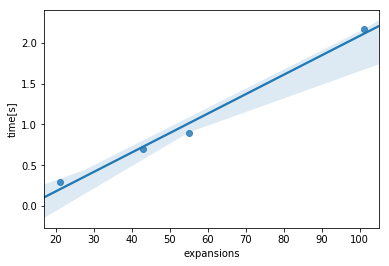

In [276]:
import matplotlib as plt
#df.plot.scatter('expansions','time[s]')
fig=sns.regplot(x="expansions", y="time[s]", data=df.drop('breadth_first_tree_search'))

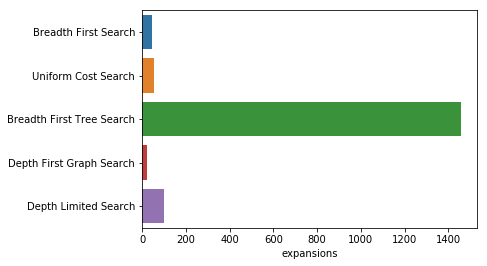

In [357]:
utils.barh("expansions","algorithm", df)

##### Space complexity

Here we will consider the number of nodes created and the effective branching factor.

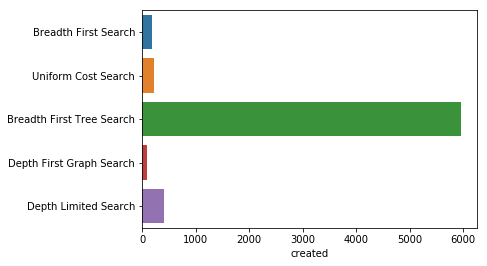

In [358]:
utils.barh("created","algorithm", df)

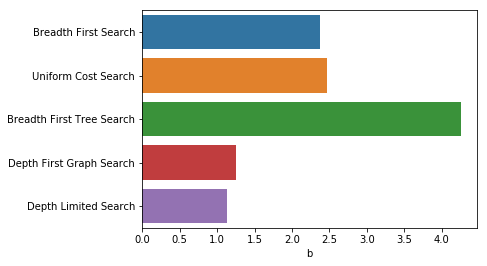

In [359]:
utils.barh("b","algorithm", df)

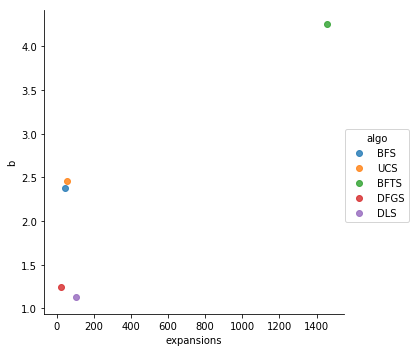

In [362]:
fig=sns.lmplot(x="expansions", y="b", data=df.reset_index(),fit_reg=False,hue='algo')

### Informed search algorithms

Next we have the *informed* search algorithms.

In [89]:
reload(utils)
informed=dict()
informed['performance'],informed['solution']=utils.load_results('informed',1)
df=informed['performance'].sort_values(by=['length','expansions'])
df.set_index(['algorithm','algo','heuristic'])[['length','optimal']]

length  optimal
algorithm                  algo  heuristic                 
Greedy Best First Graph Se GBFGS H1              6     True
Astar Se                   AS    HPL             6     True
                                 HIP             6     True
                                 H1              6     True
Recursive Best First Se    RBFS  H1              6     True

In [90]:
informed=dict()
informed['performance'],informed['solution']=utils.load_results('informed',2)
df=informed['performance'].sort_values(by=['length','expansions']).drop_duplicates()
df.set_index(['algorithm','algo','heuristic'])[['length','optimal']]

length  optimal
algorithm                  algo  heuristic                 
Astar Se                   AS    HPL             9     True
                                 HIP             9     True
                                 H1              9     True
Greedy Best First Graph Se GBFGS H1             17    False

In [91]:
df=informed['performance'].sort_values(by=['length','expansions']).drop(['problem'],axis=1).drop_duplicates()
df=df.assign(b = lambda x: x.created**(1/x.length))
df.set_index(['algo','heuristic']).drop('algorithm',axis=1)

created  expansions  length  tests  time[s]  optimal   b
algo  heuristic                                                          
AS    HPL            841          86       9     88     86.1     True 2.1
      HIP          13303        1450       9   1452      9.8     True 2.9
      H1           44030        4852       9   4854     29.5     True 3.3
GBFGS H1            8910         990      17    992      6.0    False 1.7

In [92]:
informed=dict()
informed['performance'],informed['solution']=utils.load_results('informed',3)
df=informed['performance'].sort_values(by=['length','expansions']).drop_duplicates()
df.set_index(['algorithm','algo','heuristic'])[['length','optimal']]

length  optimal
algorithm                  algo  heuristic                 
Astar Se                   AS    HIP            12     True
                                 H1             12     True
Greedy Best First Graph Se GBFGS H1             22    False

In [93]:
df=informed['performance'].sort_values(by=['length','expansions']).drop(['problem'],axis=1).drop_duplicates()
df=df.assign(b = lambda x: x.created**(1/x.length))
df.set_index(['algo','heuristic']).drop('algorithm',axis=1)

created  expansions  length  tests  time[s]  optimal   b
algo  heuristic                                                          
AS    HIP          44944        5040      12   5042    960.9     True 2.4
      H1          159716       18235      12  18237   3094.8     True 2.7
GBFGS H1           49429        5614      22   5616     47.5    False 1.6

In [23]:
df=informed['solution']
optimal=dict()
for i,v in df[df.optimal].iterrows():
    optimal[v.algo]=v.solution
pd.DataFrame.from_dict(optimal).head(6)

,AS,GBFGS,RBFS
0,"Load(C1, P1, SFO)","Load(C1, P1, SFO)","Load(C2, P2, JFK)"
1,"Fly(P1, SFO, JFK)","Load(C2, P2, JFK)","Load(C1, P1, SFO)"
2,"Load(C2, P2, JFK)","Fly(P1, SFO, JFK)","Fly(P2, JFK, SFO)"
3,"Fly(P2, JFK, SFO)","Fly(P2, JFK, SFO)","Unload(C2, P2, SFO)"
4,"Unload(C1, P1, JFK)","Unload(C1, P1, JFK)","Fly(P1, SFO, JFK)"
5,"Unload(C2, P2, SFO)","Unload(C2, P2, SFO)","Unload(C1, P1, JFK)"


In [3]:
row=list(uninformed['path'].iterrows())[0]
print(row[0])
g=draw_path(row[1].values[0])
g._repr_svg()

breadth_first_search


NameError: name 'draw_path' is not defined

In [ ]:
def draw_path(path,airports=['SFO','JFK']):
    import pydot
    g = pydot.Dot()    
    g.set_type('digraph')
    g.set_rankdir('LR')
    g.set_node_defaults(fontname = "helvetica",fontsize=10)    
    g.set_edge_defaults(fontname = "helvetica",fontsize=9)

    for s in ['Eaten(Cake)', 'Have(Cake)']:
        g.add_node(pydot.Node(name=s,label=s,shape='doublecircle'))    

    ['darkorange','darkorchid','darksalmon','deepskyblue','deeppink']
    i=1
    for action in path[0:-1]:
        
        a,arg=action.split('(')
        arg1,arg2,arg3=arg.split(',')
        arg2=arg2.replace(' ','')
        arg3=arg3[0:-1].replace(' ','')
        if a=='Fly':
            p,f,t=arg1,arg2,arg3
            g.add_edge(pydot.Edge(f,t,label='{}: {} ({})'.format(i,a,p)))    
        else: 
            c,p,f=arg1,arg2,arg3
            if a=='Load':
                g.add_edge(pydot.Edge(f,f,color=color[0],label='{}: {} ({}=>{})'.format(i,a,c,p)))    
            else:
                g.add_edge(pydot.Edge(f,f,dir='back',label='{}: {} ({}=>{})'.format(i,a,p,c)))    

        i=i+1
    print(g.to_string())

In [58]:
import example_have_cake
from aimacode.search import Node
problem=example_have_cake.have_cake()
#print(dot_tree(p))
from my_air_cargo_problems import air_cargo_p2
problem=air_cargo_p2()

In [51]:
root = Node(problem.initial)    
flatten = lambda l: [item for sublist in l for item in sublist]
children=[root.child_node(problem, action) for action in problem.actions(root.state)]    
grandchildren=flatten([[child.child_node(problem, action) for action in problem.actions(child.state)] for child in children])    
greatgrandchildren=flatten([[child.child_node(problem, action) for action in problem.actions(child.state)] for child in grandchildren])    
nodes=set(children+grandchildren+greatgrandchildren)


In [59]:
print(dot_tree(problem))

digraph G {
node [fontname=helvetica, fontsize=10];
edge [fontname=helvetica, fontsize=9];
TTTTTTFFFFFFFFFFFFFFFFFFFFF [shape=doublecircle, label=TTTTTTFFFFFFFFFFFFFFFFFFFFF];
TTTTFTFFFFFFFFFFFFFFFFFFTFF [label=TTTTFTFFFFFFFFFFFFFFFFFFTFF, penwidth=1];
TTTTTFFFFFFFFFFFFFFFFFFFFFT [label=TTTTTFFFFFFFFFFFFFFFFFFFFFT, penwidth=1];
TFTTTTFFFTFFFFFFFFFFFFFFFFF [label=TFTTTTFFFTFFFFFFFFFFFFFFFFF, penwidth=1];
FTTTTTFFFFFFFTFFFFFFFFFFFFF [label=FTTTTTFFFFFFFTFFFFFFFFFFFFF, penwidth=1];
TTTFTTFFFFFFFFFFFFFFFTFFFFF [label=TTTFTTFFFFFFFFFFFFFFFTFFFFF, penwidth=1];
TTTFTTFFFFFFFFFFFFFFFFTFFFF [label=TTTFTTFFFFFFFFFFFFFFFFTFFFF, penwidth=1];
TTTTTFFFFFFFFFFFFFFFFFFFFTF [label=TTTTTFFFFFFFFFFFFFFFFFFFFTF, penwidth=1];
TTFTTTFFFFFFFFFFFFFFTFFFFFF [label=TTFTTTFFFFFFFFFFFFFFTFFFFFF, penwidth=1];
TTTTFTFFFFFFFFFFFFFFFFFTFFF [label=TTTTFTFFFFFFFFFFFFFFFFFTFFF, penwidth=1];
TTTTTTFFFFFFFFFFFFFFFFFFFFF -> TTTTFTFFFFFFFFFFFFFFFFFFTFF  [label="Fly ((P2, JFK, ATL))"];
TTTTTTFFFFFFFFFFFFFFFFFFFFF -> TTTTTFFF

In [56]:
def dot_tree(problem):    
   
#pre : a Problem() as input    
#post: Dot graph in string format. Paste this in http://www.webgraphviz.com/ 
#usage: print(dot_tree(problem))  
    root = Node(problem.initial)    
    flatten = lambda l: [item for sublist in l for item in sublist]
    children=[root.child_node(problem, action) for action in problem.actions(root.state)]    
    grandchildren=flatten([[child.child_node(problem, action) for action in problem.actions(child.state)] for child in children])    
    greatgrandchildren=flatten([[child.child_node(problem, action) for action in problem.actions(child.state)] for child in grandchildren])    
    nodes=set(children)#+grandchildren+greatgrandchildren)
    import pydot    
    
#make a Dot graph of the nodes and connections    
#initial state as double circle     
#goal state is marked with thick lines    
#current implementation only goes two levels down (greatgrandchildren)    
            
    g = pydot.Dot()    
    g.set_type('digraph')    
    g.set_node_defaults(fontname = "helvetica",fontsize=10)    
    g.set_edge_defaults(fontname = "helvetica",fontsize=9)        
    g.add_node(pydot.Node(name=root.state,label='{}'.format(root.state),shape='doublecircle'))    
    for n in nodes:        
        if problem.goal_test(n.state):            
            penwidth=3        
        else:            
            penwidth=1                
        g.add_node(pydot.Node(name=n.state,label='{}'.format(n.state),penwidth=penwidth))    
    for n in nodes:
        g.add_edge(pydot.Edge(n.parent.state,n.state,label='{} ({})'.format(n.action.name,n.action.args)))    
    return g.to_string()

In [33]:
import sys
sys.path.append('C:\Program Files (x86)\Graphviz2.38\bin')
sys.path.append('C:\Program Files (x86)\Graphviz2.38')
C:\Users\Administrator\Anaconda3\pkgs\graphviz-2.38.0-4\Library\bin\graphviz

from graphviz import Digraph
dot=Digraph(comment='test')
dot._repr_svg_()

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [21]:
for row in uninformed['path'].iterrows():
    print(row[0])
    draw_path(row[1].values[0])

breadth_first_search
digraph G {
rankdir=LR;
node [fontname=helvetica, fontsize=10];
edge [fontname=helvetica, fontsize=9];
SFO [shape=doublecircle, label=SFO];
JFK [shape=doublecircle, label=JFK];
SFO -> SFO  [arrowhead=diamond, label="1: Load (C1=>P1)"];
JFK -> JFK  [arrowhead=diamond, label="2: Load (C2=>P2)"];
JFK -> SFO  [label="3: Fly (P2)"];
SFO -> SFO  [arrowtail=odiamond, dir=back, label="4: Unload (P2=>C2)"];
SFO -> JFK  [label="5: Fly (P1)"];
JFK -> JFK  [arrowtail=odiamond, dir=back, label="6: Unload (P1=>C1)"];
}

breadth_first_tree_search
digraph G {
rankdir=LR;
node [fontname=helvetica, fontsize=10];
edge [fontname=helvetica, fontsize=9];
SFO [shape=doublecircle, label=SFO];
JFK [shape=doublecircle, label=JFK];
SFO -> SFO  [arrowhead=diamond, label="1: Load (C1=>P1)"];
JFK -> JFK  [arrowhead=diamond, label="2: Load (C2=>P2)"];
JFK -> SFO  [label="3: Fly (P2)"];
SFO -> SFO  [arrowtail=odiamond, dir=back, label="4: Unload (P2=>C2)"];
SFO -> JFK  [label="5: Fly (P1)"];
JFK 

In [19]:
def draw_path(path,airports=['SFO','JFK']):
    import pydot
    g = pydot.Dot()    
    g.set_type('digraph')
    g.set_rankdir('LR')
    g.set_node_defaults(fontname = "helvetica",fontsize=10)    
    g.set_edge_defaults(fontname = "helvetica",fontsize=9)

    for airport in airports:
        g.add_node(pydot.Node(name=airport,label=airport,shape='doublecircle'))    

    i=1
    for action in path[0:-1]:
        a,arg=action.split('(')
        arg1,arg2,arg3=arg.split(',')
        arg2=arg2.replace(' ','')
        arg3=arg3[0:-1].replace(' ','')
        if a=='Fly':
            p,f,t=arg1,arg2,arg3
            g.add_edge(pydot.Edge(f,t,label='{}: {} ({})'.format(i,a,p)))    
        else: 
            c,p,f=arg1,arg2,arg3
            if a=='Load':
                g.add_edge(pydot.Edge(f,f,arrowhead='diamond',label='{}: {} ({}=>{})'.format(i,a,c,p)))    
            else:
                g.add_edge(pydot.Edge(f,f,arrowtail='odiamond',dir='back',label='{}: {} ({}=>{})'.format(i,a,p,c)))    

        i=i+1
    print(g.to_string())
    

In [ ]:
def dot_tree(problem):    
   
#pre : a Problem() as input    
#post: Dot graph in string format. Paste this in http://www.webgraphviz.com/ 
#usage: print(dot_tree(problem))  
    root = Node(problem.initial)    
    flatten = lambda l: [item for sublist in l for item in sublist]
    children=[root.child_node(problem, action) for action in problem.actions(root.state)]    
    grandchildren=flatten([[child.child_node(problem, action) for action in problem.actions(child.state)] for child in children])    
    greatgrandchildren=flatten([[child.child_node(problem, action) for action in problem.actions(child.state)] for child in grandchildren])    
    nodes=set(children+grandchildren+greatgrandchildren)
    import pydot    
    
#make a Dot graph of the nodes and connections    
#initial state as double circle     
#goal state is marked with thick lines    
#current implementation only goes two levels down (greatgrandchildren)    
            
    g = pydot.Dot()    
    g.set_type('digraph')    
    g.set_node_defaults(fontname = "helvetica",fontsize=10)    
    g.set_edge_defaults(fontname = "helvetica",fontsize=9)        
    g.add_node(pydot.Node(name=root.state,label='{}'.format(root.state),shape='doublecircle'))    
    for n in nodes:        
        if problem.goal_test(n.state):            
            penwidth=3        
        else:            
            penwidth=1                
        g.add_node(pydot.Node(name=n.state,label='{}'.format(n.state),penwidth=penwidth))    
    for n in nodes:
        g.add_edge(pydot.Edge(n.parent.state,n.state,label='{} ({})'.format(n.action.name,n.action.args)))    
   return g.to_string()

##### Informed Search Algorithms

In [132]:
informed=dict()
informed['performance'],informed['path']=load_results('informed',1)
informed['performance']

expansions  tests  created  \
algorithm                  heuristic                                            
recursive_best_first_se    h_1                           4229   4230    17023   
greedy_best_first_graph_se h_1                              7      9       28   
astar_se                   h_1                             55     57      224   
                           h_ignore_preconditions          41     43      170   
                           h_pg_levelsum                   11     13       50   

                                                   length   seconds  
algorithm                  heuristic                                 
recursive_best_first_se    h_1                          6  4.860465  
greedy_best_first_graph_se h_1                          6  0.009442  
astar_se                   h_1                          6  0.064447  
                           h_ignore_preconditions       6  0.060539  
                           h_pg_levelsum                6  1.497370

### Problem 2